## Process & group soil files

After doing a lot of digging around, my conclusion is that there are not a lot of good resources out there to do this in Python. Some pointers include: 
- Plotly: https://plotly.com/python/ternary-plots/
- Plotly ternary plot polygon info: https://chart-studio.plotly.com/~plotly2_demo/455/#code
- soil texture wizerd with R: https://cran.r-project.org/web/packages/soiltexture/vignettes/soiltexture_vignette.pdf
    - this package seems very comprehensive, but works with R
- python-ternary with Python: https://github.com/marcharper/python-ternary
- USDA soil texture calculator: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/soils/survey/?cid=nrcs142p2_054167
- soil texture lookup table: https://www.researchgate.net/post/Is-there-anyone-who-knows-how-we-can-made-a-soil-texture-map-from-three-layer-of-clay-loam-and-sand-in-ARCmap

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import seaborn as sns
import plotly.express as px

from soilquery import soilquery

In [2]:
df_soils = pd.read_csv('/home/disk/eos8/ach315/upscale/weadata/soiltexture.csv', index_col=0)
df_soils.head()

,cokey,chkey,prcent,slope_r,slope,hzname,depth,awc,clay,silt,sand,OM,dbthirdbar,th33,bd,site,lat,lon,depth_category,texture
0,20681154,60804747,60.0,1.0,2,H1,0.0,0.07,7.0,6.6,86.4,1.50,1.55,16.6,-0.1505,723110,32.117,-81.20,0,sand
1,20681154,60804748,60.0,1.0,2,H2,71.0,0.11,25.0,18.0,57.0,0.25,1.63,24.9,-0.2327,723110,32.117,-81.20,50-100,sandy clay loam
2,20681154,60804749,60.0,1.0,2,H3,150.0,0.11,27.5,17.4,55.1,0.25,1.63,25.9,-0.2427,723110,32.117,-81.20,100-150,sandy clay loam
3,20646330,60671139,85.0,3.0,5,A,0.0,0.04,1.5,4.9,93.6,0.53,1.45,5.2,-0.0375,722255,30.400,-84.35,0,sand
4,20646330,60671138,85.0,3.0,5,C,18.0,0.04,1.0,1.1,97.9,0.05,1.45,4.0,-0.0255,722255,30.400,-84.35,0-50,sand


In [10]:
df_soils['sgroup'] = ''

#### Soil group 1: sand

In [28]:
# soil group 1: sand
soil_category = ((df_soils.texture == 'sand') | (df_soils.texture == 'sandy loam') | 
                 (df_soils.texture == 'sandy clay loam') | (df_soils.texture == 'sandy clay'))
df_soils.loc[soil_category, 'sgroup'] = 1

# soil group 2: loam
soil_category = ((df_soils.texture == 'clay loam') | (df_soils.texture == 'loam'))
df_soils.loc[soil_category, 'sgroup'] = 2

# soil group 3: silt 
soil_category = ((df_soils.texture == 'silty clay') | (df_soils.texture == 'silty clay loam') | 
                 (df_soils.texture == 'silt loam'))
df_soils.loc[soil_category, 'sgroup'] = 3

# soil group 4: clay
soil_category = ((df_soils.texture == 'clay'))
df_soils.loc[soil_category, 'sgroup'] = 4

Text(0.79, 0.695, 'clay')

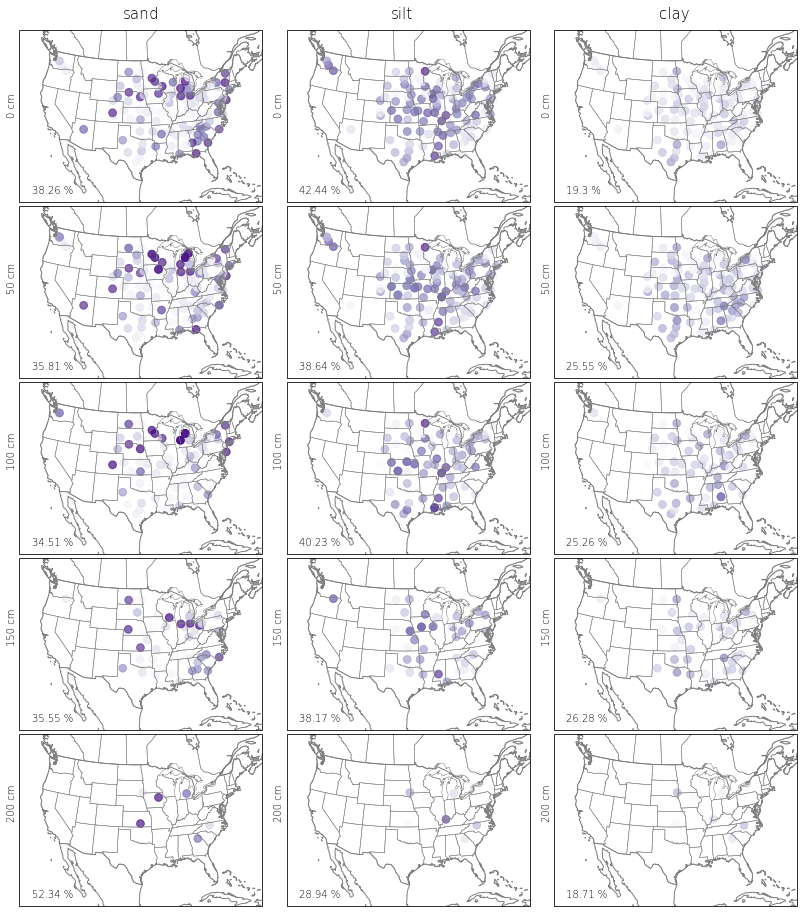

In [3]:
from palettable.colorbrewer.sequential import Purples_9

stypes=['sand', 'silt', 'clay']*5
pmins = [[-1]*3, [0]*3, [50]*3, [100]*3, [150]*3]
pmins = np.concatenate(pmins).ravel().tolist()
pmaxs = [[0]*3, [50]*3, [100]*3, [150]*3, [200]*3]
pmaxs = np.concatenate(pmaxs).ravel().tolist()

fig = plt.figure(figsize=(12,32))

for i in np.arange(1,16):
    ax = fig.add_subplot(5,3,i, projection=ccrs.AlbersEqualArea(
        central_latitude=39.5, central_longitude=-98.35))
    ax.set_extent([-123, -72, 19, 53])
    
    df_s = df_soils[(df_soils.depth > pmins[i-1]) & (df_soils.depth <= pmaxs[i-1])]

    ax.scatter(df_s.lon, df_s.lat, transform=ccrs.PlateCarree(), s=60,
               c=df_s[stypes[i-1]], vmin=0, vmax=100, cmap=Purples_9.mpl_colormap, alpha=0.7)
    ax.add_feature(cfeature.BORDERS, edgecolor='grey')
    ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
    ax.text(0.05, 0.05, str(round(df_s[stypes[i-1]].mean(),2))+' %', transform=ax.transAxes,
            fontweight='light')
    ax.text(-0.05, 0.5, str(pmaxs[i-1]) + ' cm', 
            rotation='vertical', fontweight='light', transform=ax.transAxes)

fig.subplots_adjust(left=0.05, bottom=0, right=0.95, top=1, wspace=0.1, hspace=-0.89)
fig.text(0.17,0.695, 'sand', fontweight='light', fontsize=15)
fig.text(0.48,0.695, 'silt', fontweight='light', fontsize=15)
fig.text(0.79,0.695, 'clay', fontweight='light', fontsize=15)

Text(0.79, 0.695, 'clay')

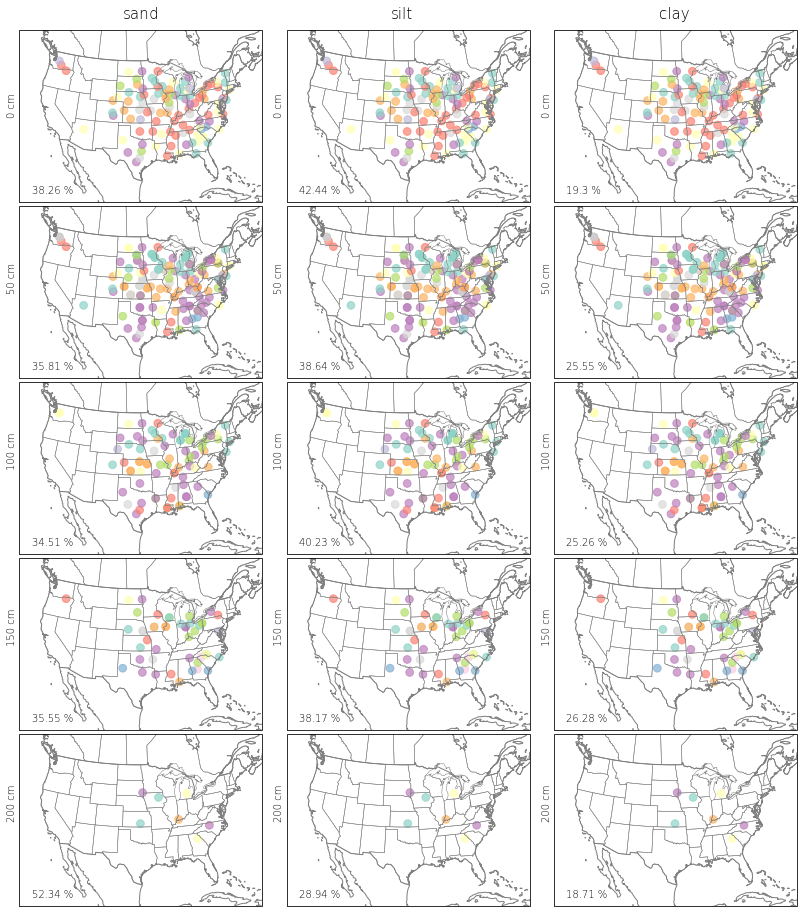

In [4]:
from palettable.colorbrewer.sequential import Purples_9

stypes=['sand', 'silt', 'clay']*5
pmins = [[-1]*3, [0]*3, [50]*3, [100]*3, [150]*3]
pmins = np.concatenate(pmins).ravel().tolist()
pmaxs = [[0]*3, [50]*3, [100]*3, [150]*3, [200]*3]
pmaxs = np.concatenate(pmaxs).ravel().tolist()
colors = {'sand':'#8dd3c7', 'sandy loam':'#ffffb3', 'loam':'#bebada', 'silt loam':'#fb8072', 'sandy clay loam':'#80b1d3',
          'silty clay loam':'#fdb462', 'clay loam':'#b3de69', 'sandy clay':'#fccde5', 'silty clay':'#d9d9d9', 'clay':'#bc80bd'}
#colors = {'sand':'#a6cee3', 'sandy loam':'#1f78b4', 'loam':'#b2df8a', 'silt loam':'#33a02c', 'sandy clay loam':'#fb9a99',
#          'silty clay loam':'#e31a1c', 'clay loam':'#fdbf6f', 'sandy clay':'#ff7f00', 'silty clay':'#cab2d6', 'clay':'#6a3d9a'}

fig = plt.figure(figsize=(12,32))

for i in np.arange(1,16):
    ax = fig.add_subplot(5,3,i, projection=ccrs.AlbersEqualArea(
        central_latitude=39.5, central_longitude=-98.35))
    ax.set_extent([-123, -72, 19, 53])
    
    df_s = df_soils[(df_soils.depth > pmins[i-1]) & (df_soils.depth <= pmaxs[i-1])]

    ax.scatter(df_s.lon, df_s.lat, transform=ccrs.PlateCarree(), s=60,
               c=df_s.texture.map(colors),
               alpha=0.7)
#               c=df_s[stypes[i-1]], vmin=0, vmax=100, cmap=Purples_9.mpl_colormap, alpha=0.7)
    ax.add_feature(cfeature.BORDERS, edgecolor='grey')
    ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
    ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
    ax.text(0.05, 0.05, str(round(df_s[stypes[i-1]].mean(),2))+' %', transform=ax.transAxes,
            fontweight='light')
    ax.text(-0.05, 0.5, str(pmaxs[i-1]) + ' cm', 
            rotation='vertical', fontweight='light', transform=ax.transAxes)

fig.subplots_adjust(left=0.05, bottom=0, right=0.95, top=1, wspace=0.1, hspace=-0.89)
fig.text(0.17,0.695, 'sand', fontweight='light', fontsize=15)
fig.text(0.48,0.695, 'silt', fontweight='light', fontsize=15)
fig.text(0.79,0.695, 'clay', fontweight='light', fontsize=15)